Submitted By: Soham Suryawanshi

## About Aerofit:

Aerofit is an Indian company that manufactures and sells fitness equipment. Aerofit has a wide range of fitness equipment, including treadmills, ellipticals, exercise bikes, spin bikes, rowing machines, weight machines, and home gyms. The company also offers a variety of fitness accessories, such as heart rate monitors, resistance bands, and yoga mats.

## Business Problem:

The Aerofit research team wants to figure out the unique characteristics of people who might be interested in each type of treadmill they sell. This will help them give better suggestions to new customers. They're looking into whether there are any differences in the types of customers for each treadmill product.

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [45]:
df=pd.read_csv("Aerofit.csv")
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [47]:
df.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [48]:
df["Product"].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [49]:
df["Gender"].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [50]:
df["MaritalStatus"].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [51]:
df["Fitness"].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

## Dataset Info: 
We can understand below information from the data:
1) We are having 180 rows in the dataset
2) Dataset have 3 products --> KP281 = 80 units
                               KP481 = 60 units
                               KP781 = 40 units
3) Dataset contains 104 Male and 76 Females
4) Dataset have 107 partnered customers and 73 singles

## Analysis of Data: 

###  Missing Values :


In [52]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

This means our data has no null values.

In [53]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


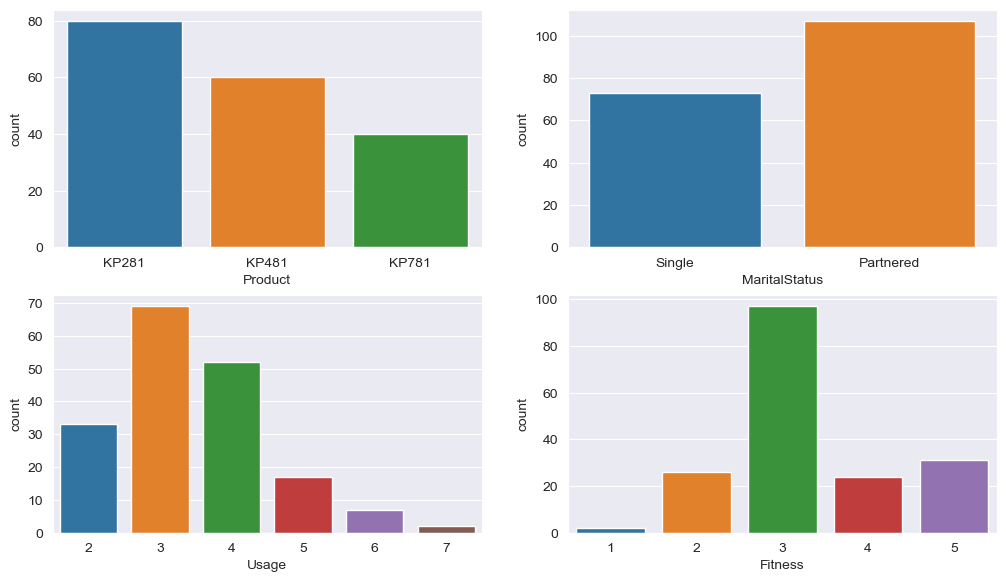

In [54]:
fig, axis = plt.subplots(nrows=2, ncols=2)
fig.subplots_adjust(right=1.6,top=1.2)

sns.countplot(data=df,x="Product",ax=axis[0,0])
sns.countplot(data=df,x="MaritalStatus",ax=axis[0,1])
sns.countplot(data=df,x="Usage",ax=axis[1,0])
sns.countplot(data=df,x="Fitness",ax=axis[1,1])
plt.show()


## Detecting Outliers:

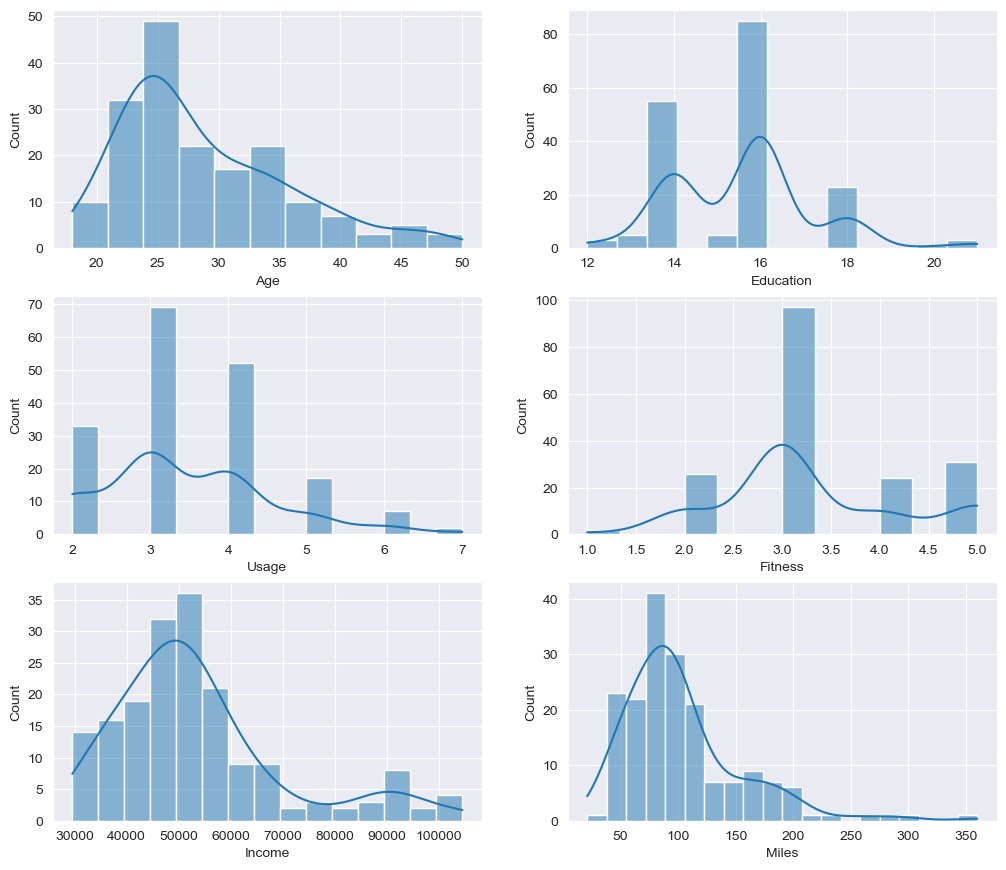

In [55]:
fig, axis = plt.subplots(nrows=3, ncols=2)
fig.subplots_adjust(right=1.6,top=1.8)

sns.histplot(data=df,x="Age",kde=True,ax=axis[0,0])
sns.histplot(data=df,x="Education",kde=True,ax=axis[0,1])
sns.histplot(data=df,x="Usage",kde=True,ax=axis[1,0])
sns.histplot(data=df,x="Fitness",kde=True,ax=axis[1,1])
sns.histplot(data=df,x="Income",kde=True,ax=axis[2,0])
sns.histplot(data=df,x="Miles",kde=True,ax=axis[2,1])
plt.show()


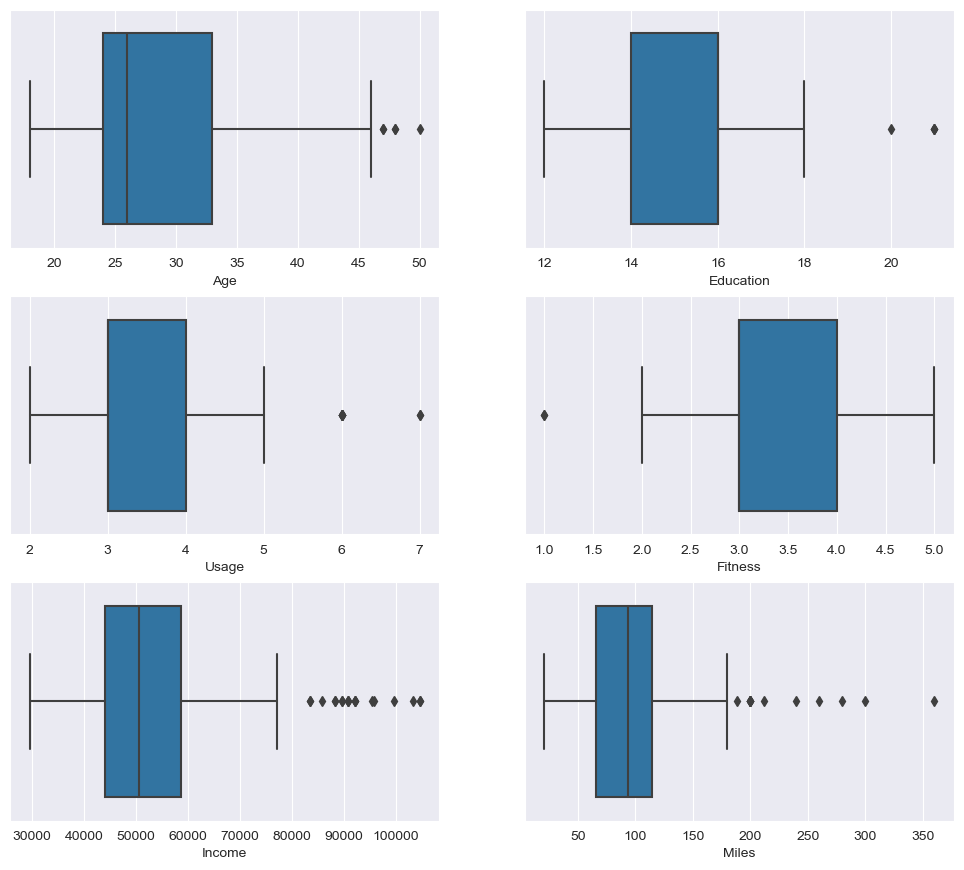

In [56]:
fig, axis = plt.subplots(nrows=3, ncols=2)
fig.subplots_adjust(right=1.6,top=1.8)

sns.boxplot(data=df,x="Age",orient="h",ax=axis[0,0])
sns.boxplot(data=df,x="Education",orient="h",ax=axis[0,1])
sns.boxplot(data=df,x="Usage",orient="h",ax=axis[1,0])
sns.boxplot(data=df,x="Fitness",orient="h",ax=axis[1,1])
sns.boxplot(data=df,x="Income",orient="h",ax=axis[2,0])
sns.boxplot(data=df,x="Miles",orient="h",ax=axis[2,1])
plt.show()

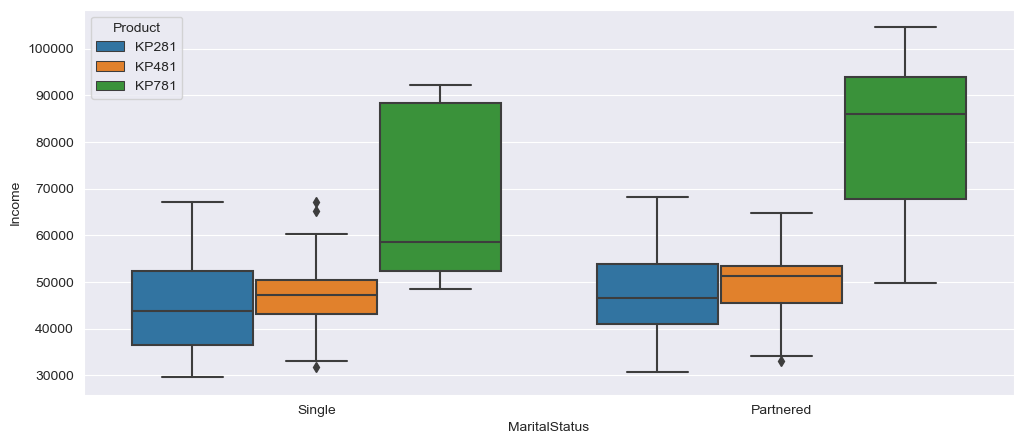

In [57]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x="MaritalStatus",y="Income",hue="Product")
plt.show()

From above boxplots, we can clearly see that mean salary of product buyers is more in Partnered customers compared to Singles in all 3 products.

In [58]:
iqr = df["Age"].quantile(0.75)-df["Age"].quantile(0.25)
iqr

9.0

In [59]:
iqr =np.percentile(df["Age"],75)-np.percentile(df["Age"],25)
print("IQR:",iqr)
lower_whisker_max = np.percentile(df["Age"],25)-1.5*iqr
print("lower_whisker_max:",lower_whisker_max)
upper_whisker_max = np.percentile(df["Age"],75)+1.5*iqr
print("upper_whisker_max:",upper_whisker_max)

IQR: 9.0
lower_whisker_max: 10.5
upper_whisker_max: 46.5


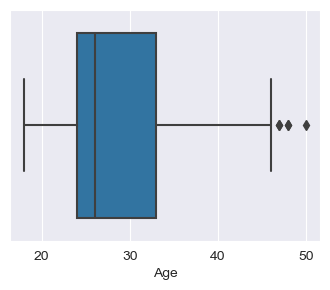

In [60]:
plt.figure(figsize=(4,3))
sns.boxplot(data=df,x="Age")
plt.show()

In [61]:
# Let's find outliers above Upper Whisker
df[df["Age"]>46.5]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
78,KP281,47,Male,16,Partnered,4,3,56850,94
79,KP281,50,Female,16,Partnered,3,3,64809,66
139,KP481,48,Male,16,Partnered,2,3,57987,64
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


So as we can see, mostly highest Income buyers belong to the age of 47,48 and 50 and all of them are married having education level 16 and 18

Let's calculate the same for income:

In [62]:
iqr =np.percentile(df["Income"],75)-np.percentile(df["Income"],25)
print("IQR:",iqr)
lower_whisker_max = np.percentile(df["Income"],25)-1.5*iqr
print("lower_whisker_max:",lower_whisker_max)
upper_whisker_max = np.percentile(df["Income"],75)+1.5*iqr
print("upper_whisker_max:",upper_whisker_max)

IQR: 14609.25
lower_whisker_max: 22144.875
upper_whisker_max: 80581.875


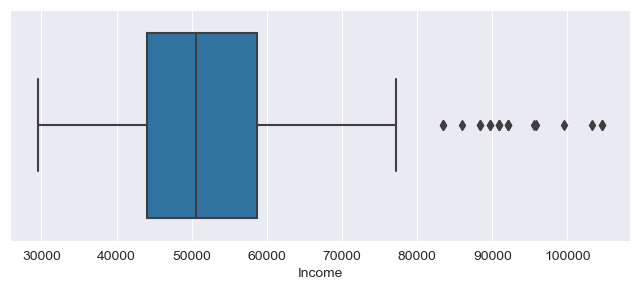

In [63]:
plt.figure(figsize=(8,3))
sns.boxplot(data=df,x="Income")
plt.show()

In [64]:
df[df["Income"]>80581.875]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
159,KP781,27,Male,16,Partnered,4,5,83416,160
160,KP781,27,Male,18,Single,4,3,88396,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
162,KP781,28,Female,18,Partnered,6,5,92131,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
168,KP781,30,Male,18,Partnered,5,4,103336,160
169,KP781,30,Male,18,Partnered,5,5,99601,150
170,KP781,31,Male,16,Partnered,6,5,89641,260


In the data, there are some values in the "Income" column that are much higher than the rest. These high values are only found in the "KP781" product category, which happens to be the most expensive treadmill. This suggests that people who buy this expensive treadmill tend to have higher incomes.

The treadmills are grouped into three categories:( Given to us)

The KP281 is an entry-level treadmill that sells for $1,500.

The KP481 is for mid-level runners that sell for $1,750.

The KP781 treadmill is having advanced features that sell for $2,500.

In [65]:
df["MaritalStatus"].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

## Single Customers: 

In [66]:
single_df = df[df["MaritalStatus"]=="Single"]
single_df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
3,KP281,19,Male,12,Single,3,3,32973,85
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
...,...,...,...,...,...,...,...,...,...
165,KP781,29,Male,18,Single,5,5,52290,180
172,KP781,34,Male,16,Single,5,5,92131,150
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200


In [67]:
single_df["Product"].value_counts()

KP281    32
KP481    24
KP781    17
Name: Product, dtype: int64

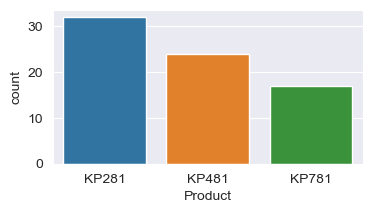

In [68]:
plt.figure(figsize=(4,2))
sns.countplot(data=single_df,x="Product")
plt.show()

### Conditinal Probability of different product bought given that a person is Single
### P(No. of particular product bought | buyer is Single)

Probability of purchasing a particular product by Customer:

Probability for KP281= 32/(32+24+17)=32/73= 43%

Probability for KP481= 24/73= 32.8%

Probability for KP781= 17/73= 23.3%

If the status of the customer is single, the probability to buy the product KP281 is higher among all the product.

## Married Customers: 

In [69]:
married_df=df[df["MaritalStatus"]=="Partnered"]
married_df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
2,KP281,19,Female,14,Partnered,4,3,30699,66
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
9,KP281,21,Female,15,Partnered,2,3,37521,85
...,...,...,...,...,...,...,...,...,...
171,KP781,33,Female,18,Partnered,4,5,95866,200
173,KP781,35,Male,16,Partnered,4,5,92131,360
174,KP781,38,Male,18,Partnered,5,5,104581,150
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [70]:
married_df["Product"].value_counts()

KP281    48
KP481    36
KP781    23
Name: Product, dtype: int64

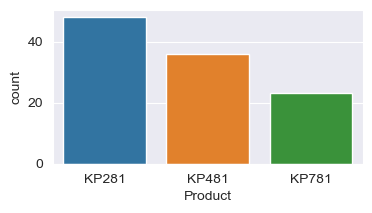

In [71]:
plt.figure(figsize=(4,2))
sns.countplot(data=married_df,x="Product")
plt.show()

### Conditinal Probability of different product bought given that a person is Partenered
### P(No. of particular product bought | buyer is Partenered)

Probability of purchasing a particular product by Partnered Customer:

Probability for KP281= 48/(48+36+23)=48/107 =  44.85%

Probability for KP481= 36/107= 33.64%

Probability for KP781= 23/107= 21.5%

If the status of the customer is Partnered, the probability to buy the product KP281 is higher among all the product

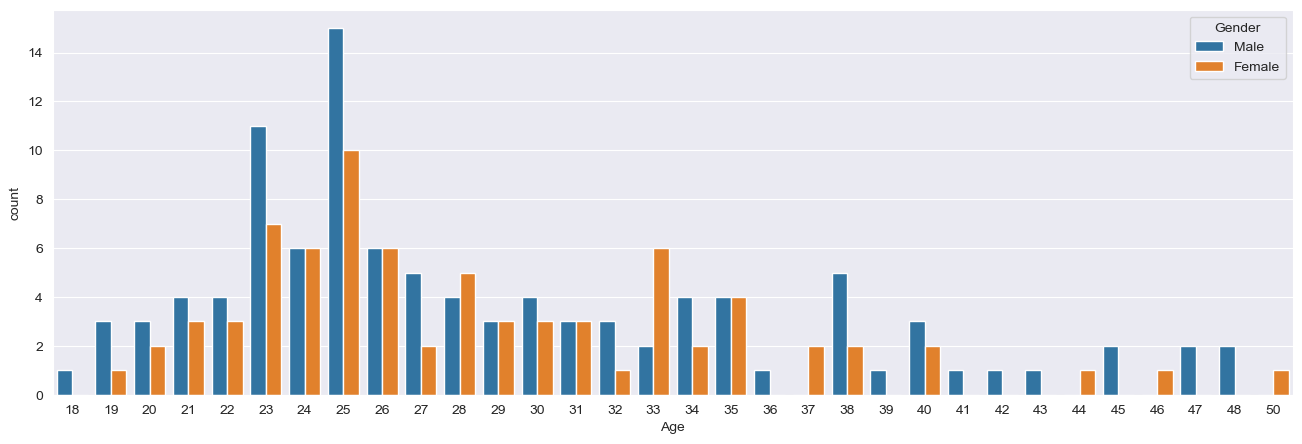

In [72]:
plt.figure(figsize=(16,5))
sns.countplot(data=df,x="Age",hue="Gender")
plt.show()

Prople in the age between 23 to 26 uses treadmill more often.
<br>Age of 25 years seems to be more ideal for targetting both Male and Female.

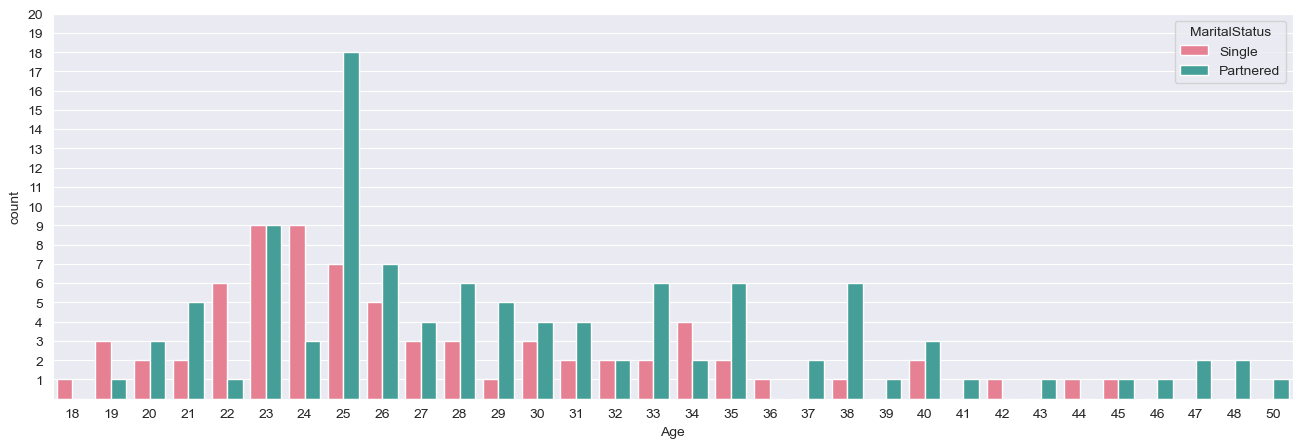

In [73]:
plt.figure(figsize=(16,5))
sns.countplot(data=df,x="Age",hue="MaritalStatus" ,palette="husl")
plt.yticks(np.arange(1,21))
plt.show()

Even from above graph we can infer that mostly partnered people bought the product who were at the age of 25

## Marginal Probability: 

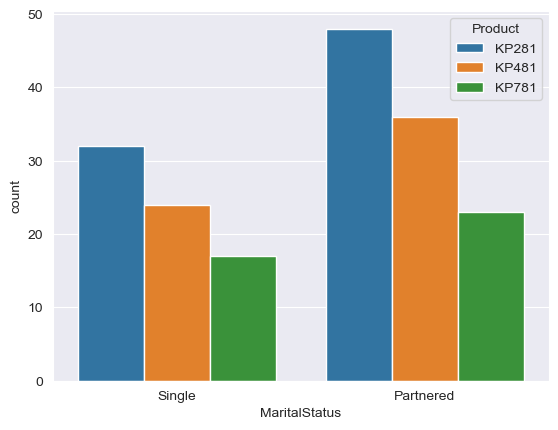

In [74]:
sns.countplot(data=df,x="MaritalStatus",hue="Product")
plt.show()

Let us calculate Marginal Probability between Product and Marital status of a customer.

In [75]:
pd.crosstab(df["Product"],df["MaritalStatus"],margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


Probability of Partnered Person bought the product KP281 = 48/180=26.6%
<br>Probability of Single Person bought the product KP281 = 32/180=17.8%

Probability of Partnered Person bought the product KP481 = 36/180=20%
<br>Probability of Single Person bought the product KP481 = 24/180=13.3%

Probability of Partnered Person bought the product KP781 = 23/180=12.7%
<br>Probability of Single Person bought the product KP781 = 17/180=9.4%

Probability of Partnered people bought any of the product is 107/180= 59.5%
<br>Probability of Single people bought any of the product is 73/180= 40.5%

Similarly, let us calculate Marginal Probability between Product and Gender of customer.

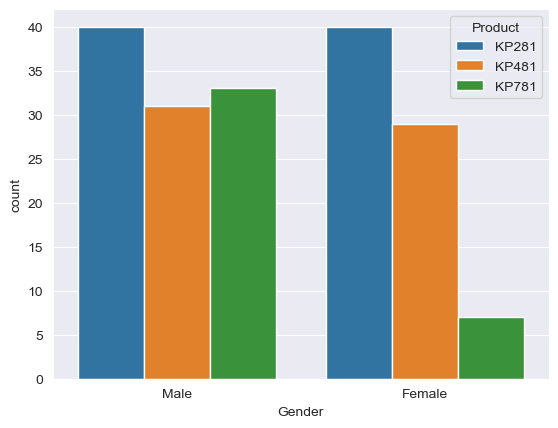

In [76]:
sns.countplot(data=df,x="Gender",hue="Product")
plt.show()

In [77]:
pd.crosstab(df["Product"],df["Gender"],margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


Probability of Male among total no. of Males buying KP281 is 40/104=38.5%
<br>Probability of Male among total no. of Males buying KP481 is 31/104=29.8%
<br>Probability of Male among total no. of Males buying KP781 is 33/104=31.7%

Probability of Female among total no. of Females buying KP281 is 40/76=52.6%
<br>Probability of Female among total no. of Females buying KP481 is 29/76=38.15%
<br>Probability of Female among total no. of Females buying KP781 is 7/76=9.2%

Similarly let us calculate Marginal probability between Product, Marital Status and Gender

In [78]:
pd.crosstab(df["Product"],[df["Gender"],df["MaritalStatus"]],margins=True)

Gender           Female             Male         All
MaritalStatus Partnered Single Partnered Single     
Product                                             
KP281                27     13        21     19   80
KP481                15     14        21     10   60
KP781                 4      3        19     14   40
All                  46     30        61     43  180

Probability of buying a product KP281 by a Female whose Marital Status is partnered = 27/180= 15%
<br>Probability of buying a product KP481 by a Female whose Marital Status is partnered = 15/180= 8.33%
<br>Probability of buying a product KP781 by a Female whose Marital Status is partnered = 4/180= 2.22%

Probability of buying any product by Female whose Marital Status is partnered = 46/180= 25.55%
<br>--------------------------------------------------------------------------------------------------------------------------


Probability of buying a product KP281 by a Female whose Marital Status is Single = 13/180= 7.22%
<br>Probability of buying a product KP481 by a Female whose Marital Status is Single = 14/180= 7.77%
<br>Probability of buying a product KP781 by a Female whose Marital Status is Single = 3/180= 1.66%

Probability of buying any product by Female whose Marital Status is Single = 30/180= 16.66%
<br>--------------------------------------------------------------------------------------------------------------------------

Probability of buying a product KP281 by a male whose Marital Status is partnered = 21/180= 11.66%
<br>Probability of buying a product KP481 by a male whose Marital Status is partnered = 21/180= 11.66%
<br>Probability of buying a product KP781 by a male whose Marital Status is partnered = 19/180= 10.55%

Probability of buying any product by male whose Marital Status is partnered = 61/180= 33.88%
<br>--------------------------------------------------------------------------------------------------------------------------

Probability of buying a product KP281 by a male whose Marital Status is Single = 19/180= 10.55%
<br>Probability of buying a product KP481 by a male whose Marital Status is Single = 10/180= 5.55%
<br>Probability of buying a product KP781 by a male whose Marital Status is Single = 14/180= 7.77%

Probability of buying any product by male whose Marital Status is Single = 43/180= 23.88%


### Fitness and Usage

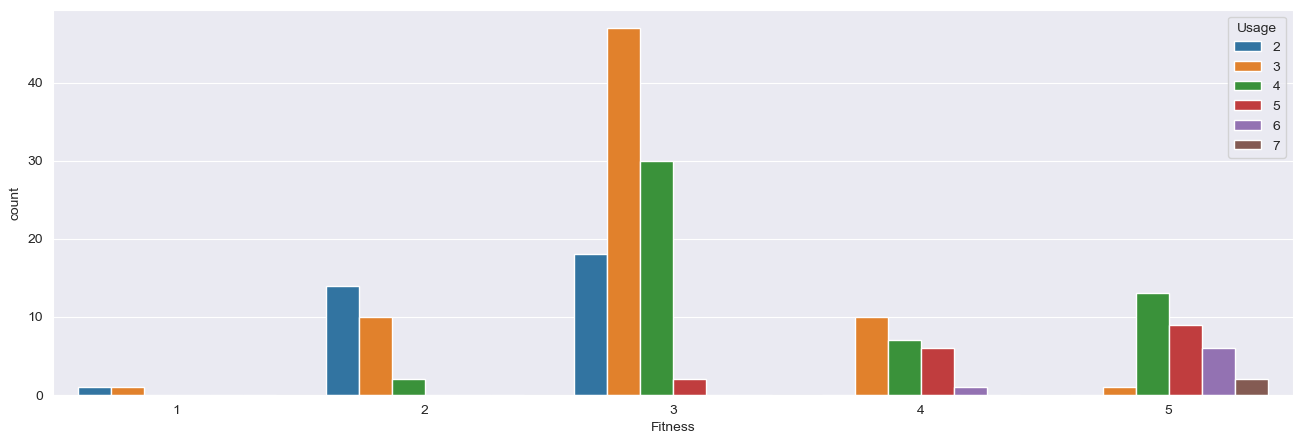

In [79]:
plt.figure(figsize=(16,5))
sns.countplot(x='Fitness',hue='Usage', data=df)
plt.show()

From the above plots, we can say that if customer average usage of treadmill is more than 5 times a week, then he will buy KP781 only. i.e.

P['KP781'|Usage>5]= 100%
i.e. customer with usage>5 will not buy the product KP281 and KP481.

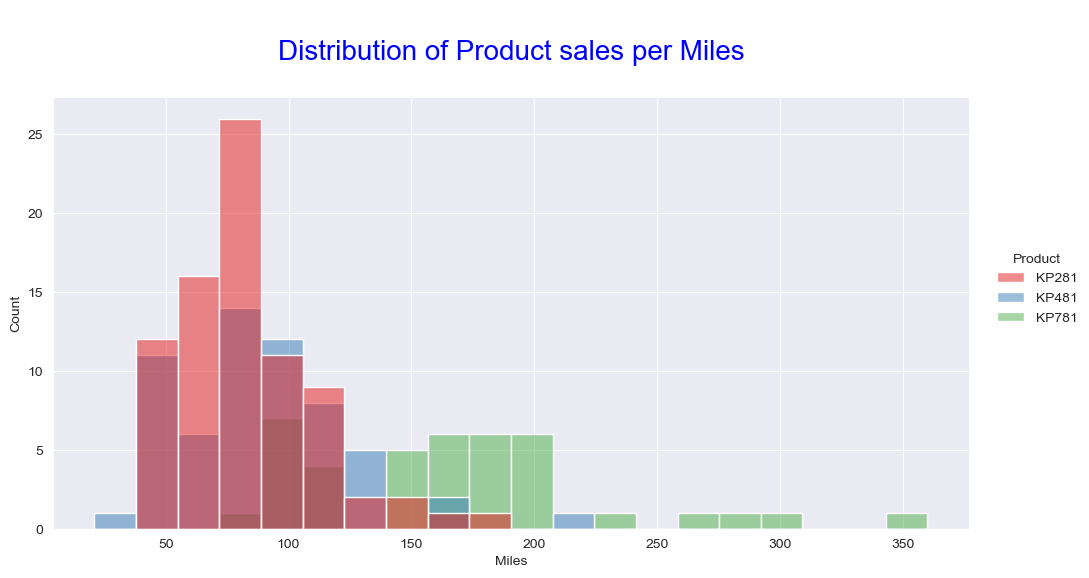

In [80]:
sns.displot(data=df, x='Miles',aspect=2, hue='Product', palette="Set1")
plt.title("\nDistribution of Product sales per Miles\n", fontsize=20, color="blue")
plt.show()

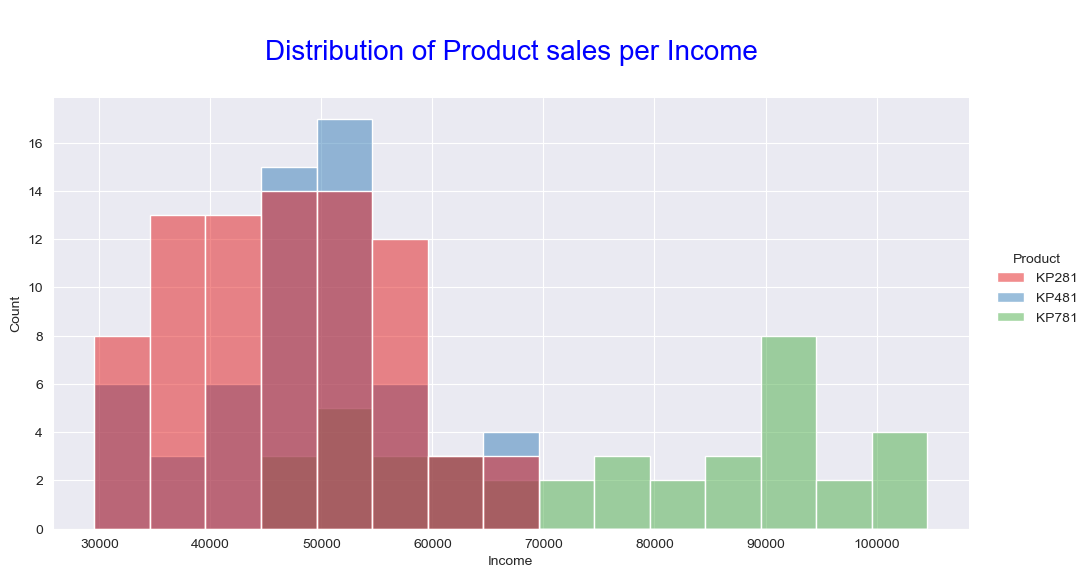

In [81]:
sns.displot(data=df, x='Income', aspect=2, hue='Product', palette="Set1")
plt.title("\nDistribution of Product sales per Income\n", fontsize=20, color="blue")
plt.show()

## Pairplot:

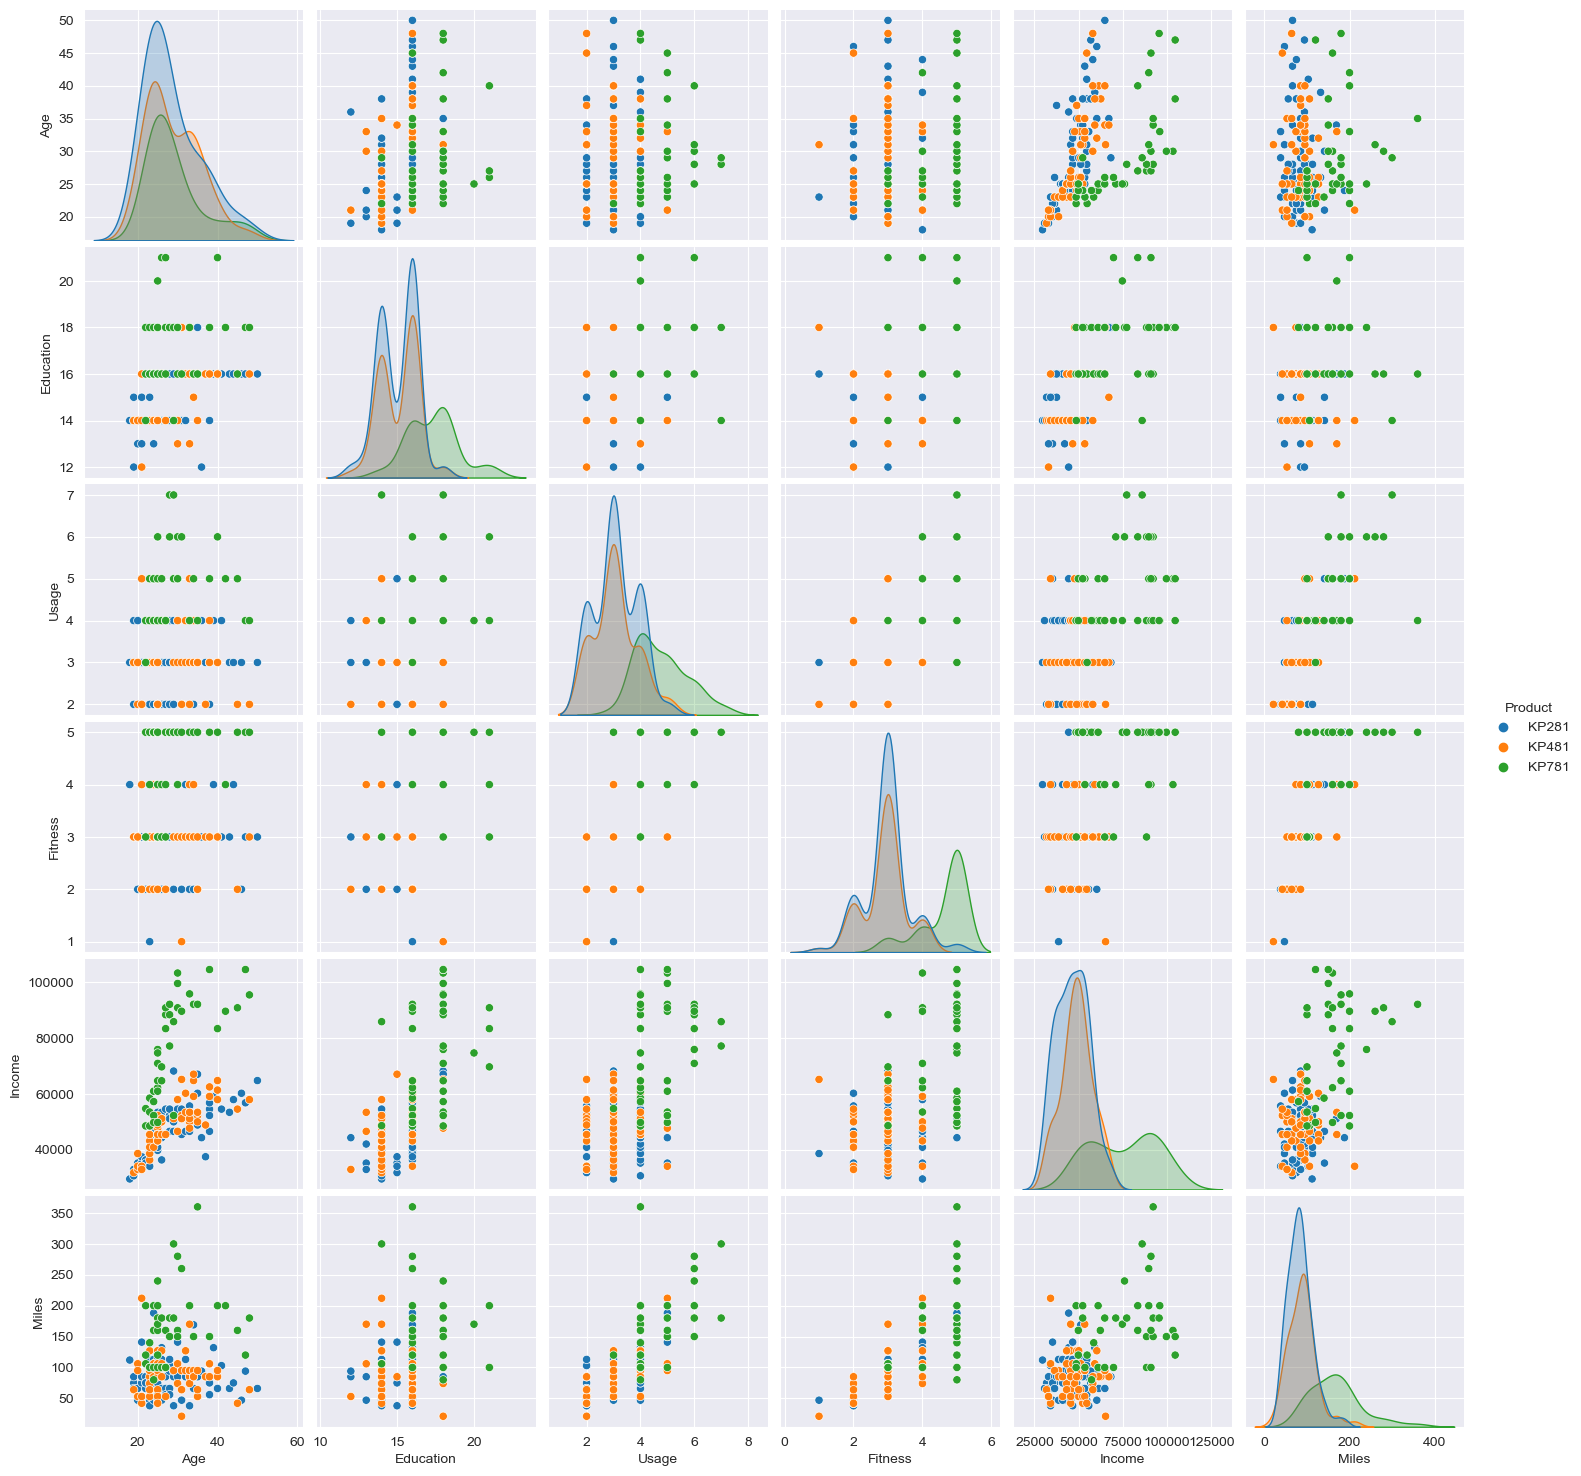

In [82]:
sns.set_style("darkgrid")
sns.pairplot(data=df, hue='Product')

plt.show()

From the above Pair Plot, it is observed :

Observing the Income- Miles Graph, we can see that high Income people are most likely to walk/run for miles greater than 200 and their age lies between 20-30

## Correlation among different factors:

In [83]:
df["New_Gender"]=df["Gender"].apply(lambda x: 1 if str(x)=="Male" else 0)
df["New_MaritalStatus"]=df["MaritalStatus"].apply(lambda x: 1 if str(x)=="Partnered" else 0)

C:\Users\Interviewbit\AppData\Local\Temp\ipykernel_15508\903485520.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(),linewidths=.5,cmap=sns.cm.rocket_r, annot=True)


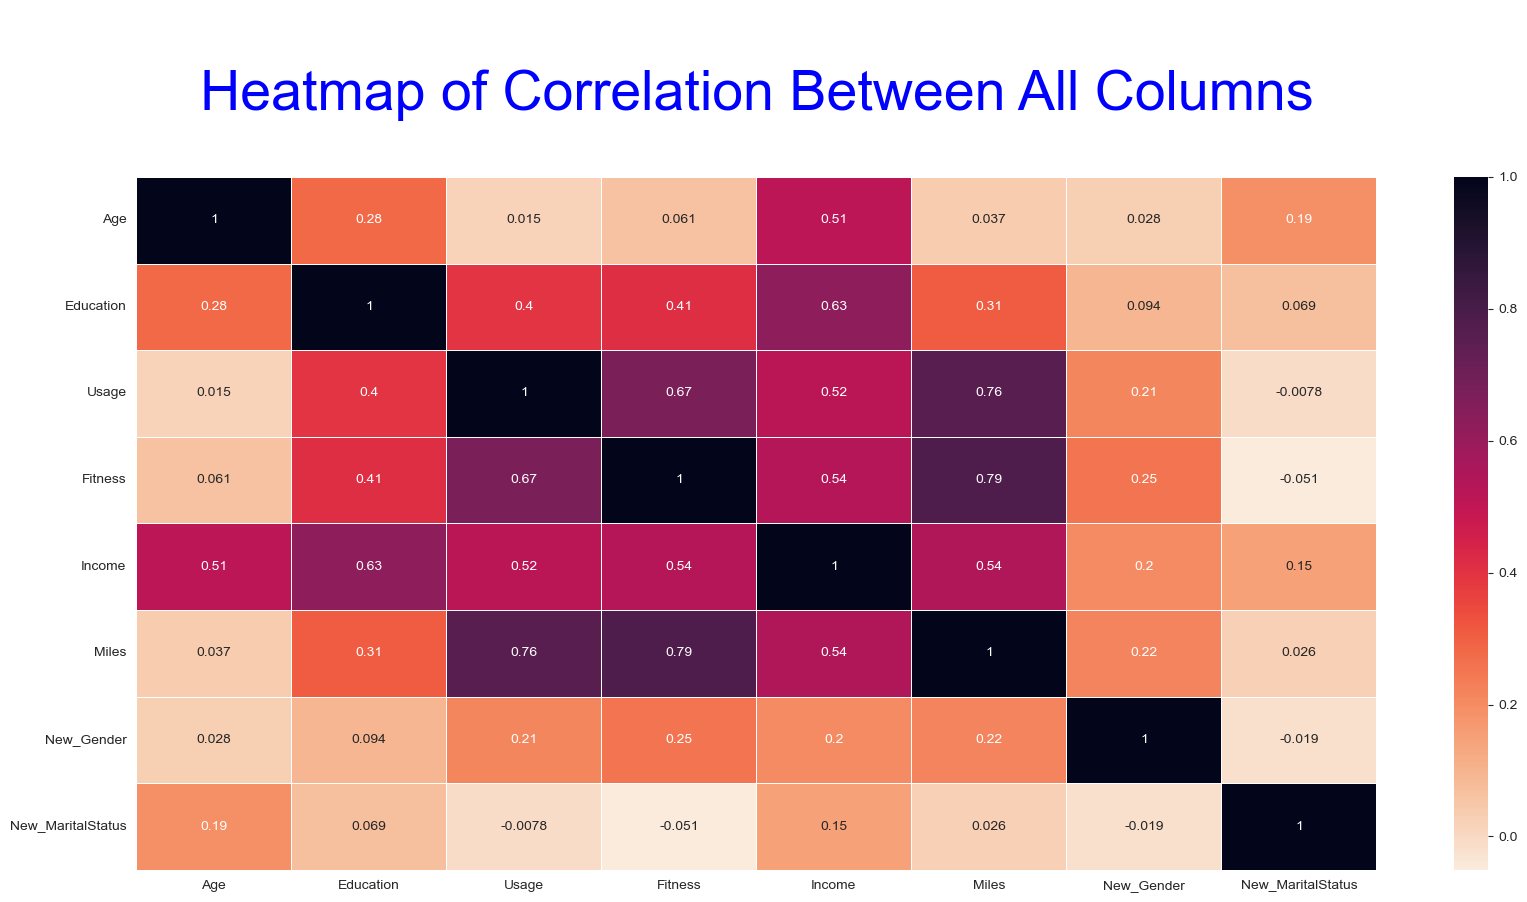

In [84]:
fig, ax = plt.subplots(figsize=(20,9))
sns.heatmap(data=df.corr(),linewidths=.5,cmap=sns.cm.rocket_r, annot=True)
plt.title("\nHeatmap of Correlation Between All Columns\n", fontsize=40, color="blue")
plt.show()

## Scatter Plot:

Let's see the relation between age, income and product.

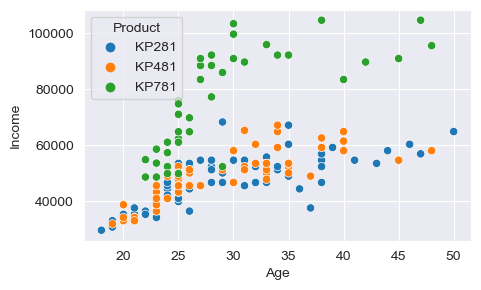

In [85]:
plt.figure(figsize=(5,3))
sns.scatterplot(data=df, x="Age",y="Income",hue="Product")
plt.show()

Based on the scatter plot, it's evident that individuals with an income exceeding $70,000 predominantly opt for the product KP781. Interestingly, this particular income bracket does not show interest in purchasing products KP281 and KP81. This suggests that product KP781 is notably favored among individuals with higher income levels, implying its popularity within the higher socioeconomic group.

In [86]:
df["Age"].value_counts(bins=8).sort_index()

(17.967, 22.0]    24
(22.0, 26.0]      67
(26.0, 30.0]      29
(30.0, 34.0]      24
(34.0, 38.0]      18
(38.0, 42.0]       8
(42.0, 46.0]       5
(46.0, 50.0]       5
Name: Age, dtype: int64

The probability of buying any product between the age 22-26 is 67/180 i.e. 37%

## We can answer below questions from our analysis:

1)What is the probability of a customer being single given that the customer buys the product KP281?

Ans: 32/180 i.e. 17.77%

2)What is the average Fitness of the customer buying KP281?

Ans: 2.97

3)What is the probability of customers whose Marital Status is Partnered and Usage is less than 4 buying the product KP481?

Ans: 27/180 i.e. 15%

4)What is the probability of a male customer buying a KP781 treadmill?

Ans: 33/180 i.e. 18.33%

5)What is the probability of a female customer who is married and buying a KP481 treadmill?

Ans: 15/180 i.e. 8.3%

6)What is the ideal duration of education for which the product is bought by the customer more often and what is their probability?

Ans: Ideal duration of education is 16 where 85 customers buy a treadmill out of which 39 buy KP281, 31 buy KP481, and 15 customers buy KP781.

7)What is the average Income of the customers buying the product KP781?

Ans: 75441

8)Which product is more likable for the customer whose age is above 40 years?

Ans: KP281 and its probability: P[KP281 | age>40] = 50%

9)Which product is more popular among the Age group of 22-26?

Ans: KP281 and its probability: P[KP281 | 21<Age<27]=31/74= 41.9%

10)Which is the most common product among single male and single female?

Ans for Single Man: KP281 and its probability is P[KP281 | Single male]=19/43 i.e. 44.18%

Ans for Single Female: KP481 and its probability is P[KP481 | Single Female]= 14/30 i.e. 46.66%

.

.







## Insights:

1. The product KP781 is majorly purchased by the people having income > $70,000 and this category of people didn't buy product KP281 and KP81. <br>

2. In the age between 22-26, a large number of people buy treadmills than any other age group. <br>

3. The product KP281 is more likely to be purchased by the customers and it adds 120K to the revenue which is highest among all the 3 products. <br>

4. Customers who are single buy the product KP281 with a probability of 43%, KP481 with 33%, and KP781 with 23%. <br>

5. High-income people are most likely to walk/run for miles greater than 200, and their age lies between 20-30. <br>

6. Probability of buying the product KP781 whose usage is greater than 5 times a week on average is 100%. <br>

7. The popularity of the product KP281 is equal among both genders. <br>

8. Aerofit generates its revenue more from the model KP281 as the buyers of this product are 33% more than the average buyer of a single product. <br>

9. Customers wose Marital Status is partnered are more likely to buy a treadmill then Single ones. <br>

10. The probability of buying a product KP781 in the age between 22 to 30 is 77.5% of the total sales of product KP781. <br>

11. Customers with age 25 are the ones who buy more treadmills among all the other ages. <br>

12. Marital Customers also buy the product KP281 more than other products. <br>

## Recommendations:

1. The Audience within the age of 22-26 should be targeted more often as this range of age is crucial for revenue generation.

2. Since the product KP281 is more likely to be sold and its market share is 45%, so the stock should be maintained for KP281 first, then KP481 and then KP781 to avoid any shortage.

3. A scheme should be introduced where if someone wants to upgrade the product, then he is eligible to get a discount of 30%-40% of the total amount of the previous product under specified terms and conditions. This way Aerofit can hold their customers for a longer time and spread their business among a larger audience. This also develops faith among the customers towards Aerofit, and ultimately the brand value increases.

4. To increase the sell of the most expensive product i.e. KP781, it should be advertised among high-class people as they are the targeted audience for that product. It should be advertised in Branded Gyms, Lavish Hotels, Airports where the footfall of the high-income people is more often. This way, revenue and profit margin can also be increased.

5. Product should be showcased according to the fitness level also which helps people in choosing the right product according to their usage and fitness, which helps in increasing the credibility of Aerofit.

6. The advertisement for KP281 should be more among social media as the audience with the age 22-26 are easily available and active there.